In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
from statsmodels.tsa.ar_model import AR,ARResults

In [4]:
df = pd.read_csv('../Data/uspopulation.csv',index_col='DATE',parse_dates=True)

In [6]:
df.index.freq = 'MS'

In [7]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2011-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
PopEst    96 non-null int64
dtypes: int64(1)
memory usage: 1.5 KB


In [9]:
train = df.iloc[:84]
test = df.iloc[84:]

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
model = AR(train['PopEst'])

In [12]:
AR1fit = model.fit(maxlag=1)

In [13]:
AR1fit.aic

6.410771237031995

In [14]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [17]:
start = len(train)
end = len(train) + len(test) - 1

In [18]:
start

84

In [20]:
predictions1 = AR1fit.predict(start=start,end=end)

In [21]:
predictions1 = predictions1.rename('ar(1) Predictions')

In [22]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: ar(1) Predictions, dtype: float64

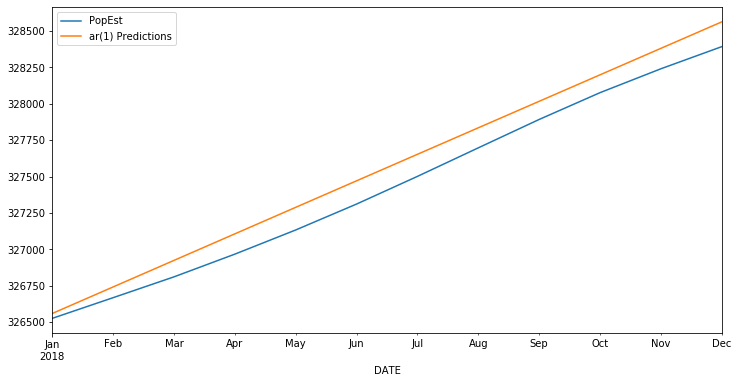

In [28]:
test.plot(figsize=(12,6),legend=True)

predictions1.plot(legend=True)

In [29]:
AR2fit = model.fit(maxlog=2)

In [30]:
AR2fit.params

const         96.143523
L1.PopEst      2.298626
L2.PopEst     -2.027441
L3.PopEst      1.356878
L4.PopEst     -1.171630
L5.PopEst      0.816723
L6.PopEst     -0.699990
L7.PopEst      0.727004
L8.PopEst     -0.354790
L9.PopEst      0.241036
L10.PopEst    -0.179865
L11.PopEst    -0.006819
dtype: float64

In [31]:
predictions2 = AR2fit.predict(start,end)
predictions2 = predictions2.rename('AR (2) Predictions')


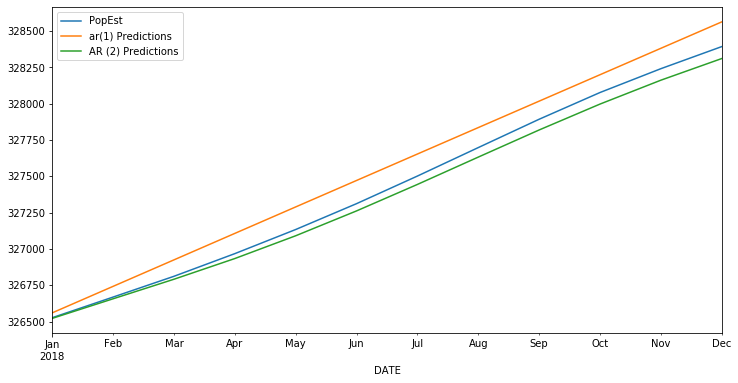

In [32]:
test.plot(figsize=(12,6),legend=True)

predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [33]:
ARfit = model.fit(ic='t-stat')

In [34]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [36]:
predictions8 = ARfit.predict(start,end)
predictions8 = predictions8.rename('AR(8) Predictions')

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
label = ['AR1','AR2','AR8']
preds = [predictions1,predictions2,predictions8]

In [43]:
for i in range(3):
    error = mean_squared_error(test['PopEst'],preds[i])
    print(f'{label[i]} MSE was :{error}')

AR1 MSE was :17449.714237833407
AR2 MSE was :3206.151497205139
AR8 MSE was :186.97263605698208


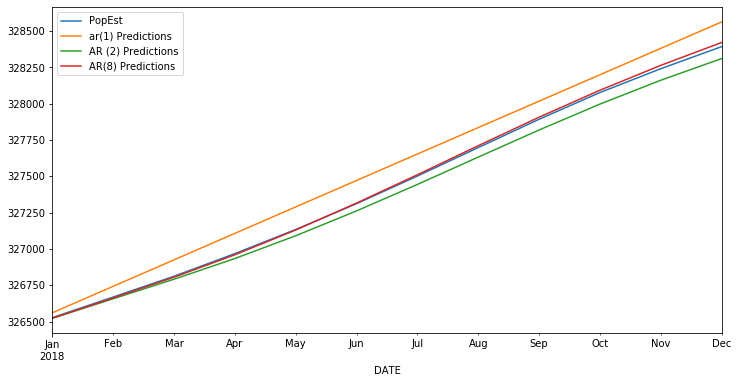

In [45]:
test.plot(figsize=(12,6),legend=True)

predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=8)

In [48]:
#forecassting

model = AR(df['PopEst'])
ARfit = model.fit()
forecasted_values = ARfit.predict(start=len(df),end=len(df)+12).rename('Forecast')

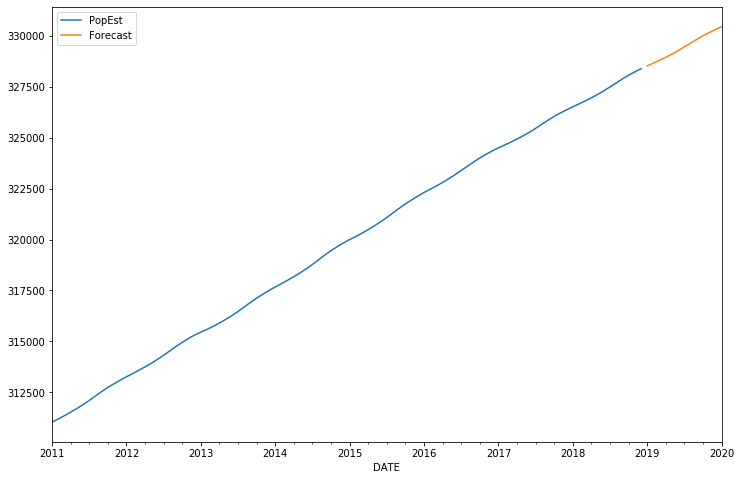

In [49]:
df['PopEst'].plot(figsize=(12,8),legend=True)
forecasted_values.plot(legend=12)
